# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

device = "mps" if torch.backends.mps.is_available else "cpu"
device

2.3.1


'mps'

In [2]:
import numpy as np
import random

def setup_seed(seed):
    torch.manual_seed(seed)
    if torch.backends.mps.is_available():
        torch.mps.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.cuda.manual_seed_all(seed)

setup_seed(42)

## 1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is applied in industries such as self-driving vehicles, manufacturing, agriculture and entertainment.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning occurs when a model learns training data too well, capturing noise and irrelevant details rather than general patterns.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1、Use a drop-out layer to deactivate some neurons.

2、Simplyify the model architecture.

3、Use a regularization loss function.(L1/L2 regularization)

4、Use k-fold cross-validation to make full use of the entire dataset.

5、Data augmentation.

6、Early stopping: stop training when validation loss stops improving.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

1. ReLU ignores negatives to avoid vanishing gradients (preserving gradients for positive inputs), add non-linearity, and speed up training.

2. Unlike standard normalization (linear 0-1 scaling), softmax uses exponentials to amplify the max logit, ensures differentiability for backpropagation, and outputs sum to 1 (probabilities).

3. A convolution layer expands 3 to 10 channels by using 10 kernel groups (3 kernels each, matching input channels), with each group generating one output feature map.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="./data",
                            train=True,
                            transform=ToTensor(),
                            download=True)
test_data = datasets.MNIST(root="./data",
                            train=False,
                            transform=ToTensor(),
                            download=True)
class_names = train_data.classes

print(len(train_data))
print(len(test_data))
print(train_data[0][0].shape)
print(len(class_names))

60000
10000
torch.Size([1, 28, 28])
10


## 6. Visualize at least 5 different samples of the MNIST training dataset.

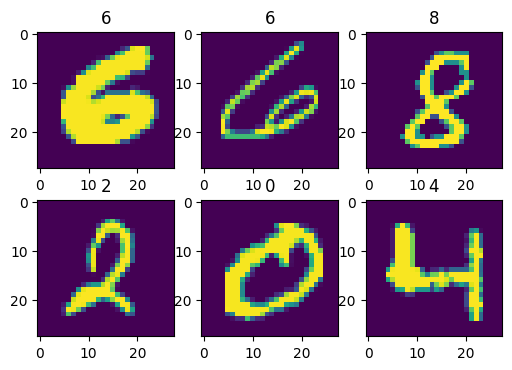

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
rows, cols = 2, 3
for i in range(rows*cols):
    random_idx = torch.randint(0, len(train_data), [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze())
    plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             BATCH_SIZE,
                             shuffle=False)
print(f"Length of train dataloader is {len(train_dataloader)}")
print(f"Length of test dataloader is {len(test_dataloader)}")
# Dataloader returns the number of batches(total samples / batch size), not the total number of samples

Length of train dataloader is 1875
Length of test dataloader is 313


In [6]:
first_batch, first_batch_label = next(iter(train_dataloader)) # iter() creates an iterator, next() fetch elements from the iterator
print(first_batch.shape, first_batch_label.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
from torch import nn

class MINISTMODELV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.MaxPool2d(2, 2) # 28*28 -> 14*14
            )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.MaxPool2d(2, 2) # 14*14 -> 7*7
            )
        self.classifer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*7*7, output_shape)
            )
    
    def forward(self, x):
        return self.classifer(self.block_2(self.block_1(x)))

In [8]:
model_2 = MINISTMODELV0(1, 10, len(class_names)).to(device)
model_2

MINISTMODELV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
def train_step(model, data_loader, loss_fn, acc_fn, optimizer, device):
    train_loss, train_acc = 0, 0
    model.train()
    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        y_preds = y_logits.argmax(dim=1)
        loss = loss_fn(y_logits, y)
        train_loss += loss_fn(y_logits, y)
        train_acc += acc_fn(y, y_preds)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:2f}%")

def test_step(model, data_loader, loss_fn, acc_fn, device):
    test_loss, test_acc = 0, 0
    model.eval()
    model.to(device)
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            y_preds = y_logits.argmax(dim=1)
            loss = loss_fn(y_logits, y)
            test_loss += loss_fn(y_logits, y)
            test_acc += acc_fn(y, y_preds)
    
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [10]:
from helper_functions import accuracy_fn
from timeit import default_timer as Timer
from tqdm.auto import tqdm
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), 0.1)

# Training time on mps
train_begin_time = Timer()
epoches = 5
device = "mps" if torch.backends.mps.is_available() else "cpu"
for epoch in tqdm(range(epoches)):
    print(f"Epoch {epoch}\n-------")
    train_step(model_2, train_dataloader, loss_fn, accuracy_fn, optimizer, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)
train_end_time = Timer()
print(f"Train time on {device}: {(train_end_time - train_begin_time):.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
-------
Train loss: 0.26534 | Train acc: 91.196667%
Test loss: 0.06268 | Test acc: 97.78%
Epoch 1
-------
Train loss: 0.06843 | Train acc: 97.900000%
Test loss: 0.05425 | Test acc: 98.12%
Epoch 2
-------
Train loss: 0.05343 | Train acc: 98.378333%
Test loss: 0.04310 | Test acc: 98.49%
Epoch 3
-------
Train loss: 0.04412 | Train acc: 98.643333%
Test loss: 0.04011 | Test acc: 98.80%
Epoch 4
-------
Train loss: 0.03831 | Train acc: 98.805000%
Test loss: 0.03747 | Test acc: 98.75%
Train time on mps: 102.073 seconds


In [11]:
# Training time on cpu
train_begin_time = Timer()
epoches = 5
device = "cpu"
for epoch in tqdm(range(epoches)):
    print(f"Epoch {epoch}\n-------")
    train_step(model_2, train_dataloader, loss_fn, accuracy_fn, optimizer, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)
train_end_time = Timer()
print(f"Train time on {device}: {(train_end_time - train_begin_time):.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
-------
Train loss: 0.03495 | Train acc: 98.921667%
Test loss: 0.03784 | Test acc: 98.75%
Epoch 1
-------
Train loss: 0.03286 | Train acc: 98.936667%
Test loss: 0.03813 | Test acc: 98.79%
Epoch 2
-------
Train loss: 0.03020 | Train acc: 99.041667%
Test loss: 0.03854 | Test acc: 98.83%
Epoch 3
-------
Train loss: 0.02790 | Train acc: 99.116667%
Test loss: 0.03445 | Test acc: 98.80%
Epoch 4
-------
Train loss: 0.02592 | Train acc: 99.183333%
Test loss: 0.03929 | Test acc: 98.83%
Train time on cpu: 212.310 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [14]:
def make_predictions(model, data, device):
    model.eval()
    model.to(device)
    pred_labels = []
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_label = pred_logit.argmax(dim=1)
            pred_labels.append(pred_label.item())
    return pred_labels

In [15]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 6): # randomly pick 6 (sample, label) from test_data
    test_samples.append(sample)
    test_labels.append(label)
print(test_samples[0].shape)
print(test_labels)

pred_labels = make_predictions(model_2, test_samples, device)
print(pred_labels)

torch.Size([1, 28, 28])
[4, 9, 1, 1, 2, 8]
[4, 9, 1, 1, 2, 8]


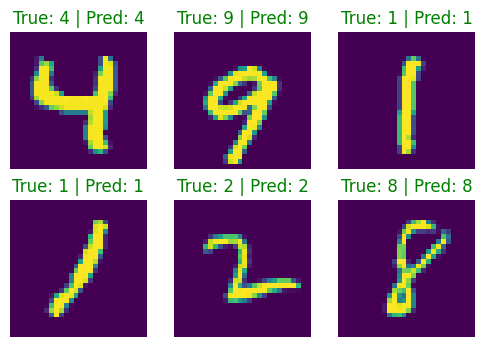

In [19]:
fig = plt.figure(figsize=(6, 4))
rows, cols = 2, 3
for i in range(rows*cols):
    img = test_samples[i]
    true_label = test_labels[i]
    pred_label = pred_labels[i]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img.squeeze())
    if true_label == pred_label:
        plt.title(f"True: {true_label} | Pred: {pred_label}",color="green")
    else:
        plt.title(f"True: {true_label} | Pred: {pred_label}",color="red")
    plt.axis("off")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [32]:
model_2.eval()
y_preds = []

with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds).to("cpu")
y_preds_tensor

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

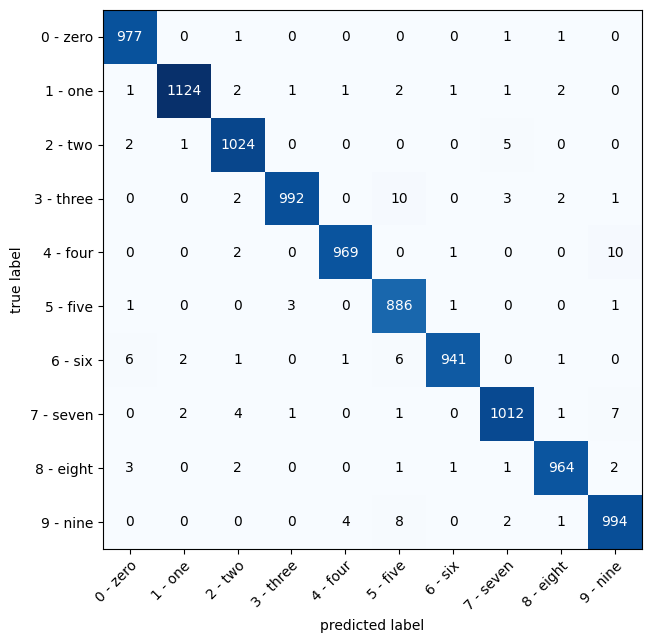

In [35]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(y_preds_tensor, test_data.targets)

plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
    )

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.rand(1, 3, 64, 64) # batches, channels, height, width

layer = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=3,
                  stride=2,
                  padding=1)

after_layer = layer(random_tensor)
print(after_layer.shape)

torch.Size([1, 10, 32, 32])

In [45]:
random_tensor = torch.rand(1, 3, 64, 64) # batches, channels, height, width

layer = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=2,
                  stride=2,
                  padding=1)

after_layer = layer(random_tensor)
print(after_layer.shape)

torch.Size([1, 10, 33, 33])


$$\text{Output Size} = \left\lfloor \frac{\text{Input Size} + 2 \times \text{Padding} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1$$

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [49]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   transform=ToTensor(),
                                   download=False)
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  transform=ToTensor(),
                                  download=False)


In [58]:
class_names = test_data.classes
print(class_names, len(class_names))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 10


In [67]:
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)

In [57]:
class FashionMNISTModelCNNV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, # because the grayscale image has 1 channel
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            # nn.ReLU(), # No ReLU before output layer
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            # nn.ReLU(),  # No ReLU before output layer
            nn.MaxPool2d(2, 2)
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # 28×28 → 7×7 (2×MaxPool2d), channels=hidden_units
                      out_features=output_shape)
            )
    
    def forward(self, X):
        return self.classifier(self.block_2(self.block_1(X)))

In [60]:
from pathlib import Path
model_path = Path("models")
model_name = "03_pytorch_computer_vision_model_cnn.pth"
model_cnn_path = model_path / model_name

loaded_model = FashionMNISTModelCNNV1(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model.load_state_dict(torch.load(model_cnn_path))
loaded_model

FashionMNISTModelCNNV1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loaded_model.to(device)
loaded_model.eval()
wrong_samples, wrong_preds, true_labels = [], [], []

with torch.inference_mode():
    for batch, (X, y) in enumerate(test_data_loader):
        X, y = X.to(device), y.to(device)
        y_logit = loaded_model(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        diff_indexes = torch.where(y_pred != y) 
        # torch.where() returns a tuple containing index tensors (one tensor per dimension of input)
        diff_list = diff_indexes[0].cpu().tolist() 
        # # Extract the index tensor from the tuple → move to CPU → convert to Python list for easy iteration
        for diff_index in diff_list:
            wrong_samples.append(X[diff_index])
            wrong_preds.append(y_pred[diff_index])
            true_labels.append(y[diff_index])

In [ ]:
print(wrong_samples[0].shape)
print(wrong_preds[0])
print(true_labels[0])
print(len(wrong_samples), len(wrong_preds), len(true_labels))

torch.Size([1, 28, 28])
tensor(8, device='mps:0')
tensor(7, device='mps:0')
1170 1170 1170


In [100]:
random_index = random.sample(range(len(wrong_preds)), k=9)
print(random_index)

[93, 466, 592, 163, 476, 206, 778, 569, 928]


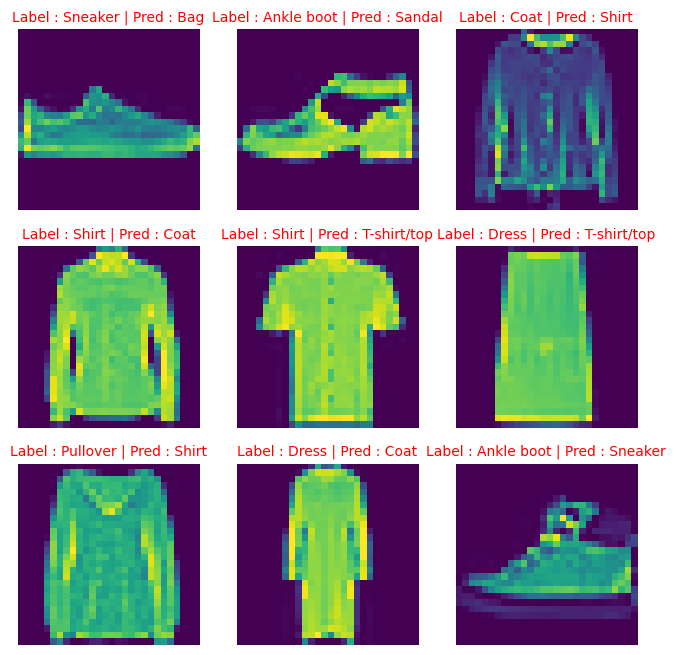

In [121]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 3, 3
for i in range(rows * cols):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(wrong_samples[i].to("cpu").squeeze())
    plt.title(f"Label : {class_names[true_labels[i].item()]} | Pred : {class_names[wrong_preds[i].item()]}", 
              color="red",
              fontsize = 10)
    plt.axis("off")

## Evidence of Modeling Error

- Patterns in Class Confusion

    For example, "Sneaker" being misclassified as "Bag" and "Ankle boot" as "Sandal" shows the model failed to learn key features of footwear (e.g., ankle height, closure type). 

- Insufficient Visual Feature Learning

    Cases like "Dress" being misclassified as "Coat" indicate the model did not capture critical visual characteristics (e.g., sleeveless design, waist silhouette), revealing a lack of ability to model clothing contours and details.

## Challenges from label similarity

- Genuine Visual Similarity Between Classes

    Misclassifications between "Shirt" and "T-shirt/top", or "Pullover" and "Shirt", do stem from their visual similarity. These are all upper-body garments with subtle differences in cut and fit, which can even confuse human annotators at times.

## Conclusion: The Model Can Be Significantly Improved

- Model Architecture Improvements: 

    Using more powerful feature extractors (e.g., increased channels, attention mechanisms) to capture finer-grained visual details.

- Data Augmentation and Refinement: 

    Adding more annotated samples for similar classes (e.g., shirts/T-shirts) with diverse augmentations (cropping, angles) to help the model learn more discriminative features.
    
- Confusion Matrix-Driven Optimization: 

    Applying sample weighting or loss function adjustments for frequently confused classes (e.g., footwear, tops) to strengthen the model’s ability to distinguish between them.